# Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Preprocessing

In [ ]:
df = pd.read_csv(r'deid-nicu-sepsis-tta.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['race'] = LE.fit_transform(df['race'])
df['period'] = LE.fit_transform(df['period'])

In [ ]:
df.drop('cx_site',
  axis='columns', inplace=True)

In [ ]:
df['length_of_stay_hours'].fillna(df['length_of_stay_hours'].median(), inplace=True)

In [ ]:
df['gestational_age_at_birth_weeks'].fillna(df['gestational_age_at_birth_weeks'].mean(), inplace=True)

In [ ]:
df['temp_celsius'].fillna(df['temp_celsius'].median(), inplace=True)

In [ ]:
df['birth_weight_kg'].fillna(df['birth_weight_kg'].mean(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop('overall_mortality_within_7_days', axis=1)
df = df.drop('overall_mortality_within_14_days', axis=1)
X = df.drop('overall_mortality_within_30_days', axis=1)
y = df.overall_mortality_within_30_days

In [ ]:
df.dtypes

episode_id                                  int64
unique_patient_id                           int64
sex                                         int64
race                                        int32
gestational_age_at_birth_weeks            float64
birth_weight_kg                           float64
sepsis_group                                int64
onset_age_in_days                           int64
onset_hour_of_day                           int64
blood_culture_positive                      int64
positive_days                               int64
time_to_antibiotics                         int64
stat_abx                                    int64
overall_mortality_within_30_days            int64
intubated_at_time_of_sepsis_evaluation      int64
intubated_free_days                         int64
inotrope_at_time_of_sepsis_eval             int64
inotrope_free_days                          int64
central_venous_line                         int64
umbilical_arterial_line                     int64


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
df.shape

(1946, 29)

In [ ]:
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy.random import RandomState
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_palette(['#06B1F0', '#FC4B60'])
random_seed = 63445
df = pd.read_csv(r'deid-nicu-sepsis-tta.csv')


import warnings
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

In [ ]:
X.shape

(1946, 28)

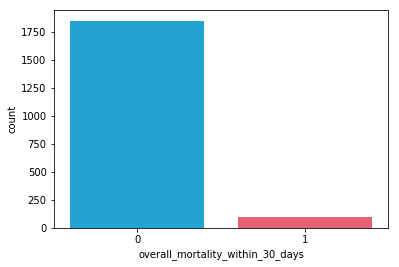

In [ ]:
sns.countplot(df['overall_mortality_within_30_days'])
plt.show()

# Handling Data Imbalance - SMOTENN

In [ ]:
def makeunderoverSample(X,Y):
    from imblearn.combine import SMOTEENN
    sm = SMOTEENN(random_state=0)
    X, Y = sm.fit_resample(X, Y)
    return(X,Y)

X , Y = makeunderoverSample(X,y)
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (2963, 28)
Shape of Y: (2963,)


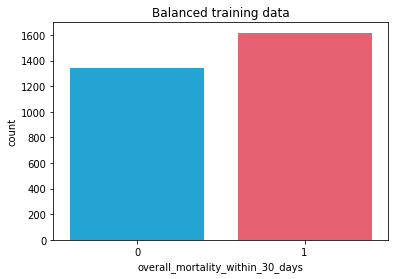

In [ ]:
sns.countplot(Y)
plt.title('Balanced training data')
plt.show()

In [ ]:
def count1(Y):
    countzero=0
    countone=0
    for i in range(0,len(Y)):
        if Y[i]==0:
            countzero=countzero+1
        elif Y[i]==1:
            countone=countone+1
    return countzero,countone

class0, class1 = count1(Y)

In [ ]:
print(class0,class1)

1346 1617


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                   test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
#X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2074, 28) (889, 28) (2074,) (889,)


# ANN -- testing different Activation functions and Optimizers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model_1 = Sequential([
    Dense(32, input_shape=(28,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Using TensorFlow backend.


In [ ]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# sgd is stochastic gradient descent --> refers to mini-batch gradient descent
# adam is a replacemet for sgd and combines RMSprop and sgd, and is one of the best optimizers. 
#      It is much more faster and efficient. --> Adaptive moment estimation
# binary_crossentropy --> loss function for output which takes the values 1 or 0
# We have chosen accuracy as the metric to test our model performance
# Now the model is ready to be trained

In [ ]:
# Training the dataset
model_1.fit(X_train, Y_train,
          batch_size=32, epochs=20, verbose = 2, 
          validation_data=(X_test, Y_test))

# epochs - it is how long we wnt to train it for

Train on 2074 samples, validate on 889 samples
Epoch 1/20
 - 0s - loss: 0.5955 - accuracy: 0.6818 - val_loss: 0.4000 - val_accuracy: 0.8470
Epoch 2/20
 - 0s - loss: 0.3338 - accuracy: 0.8857 - val_loss: 0.2767 - val_accuracy: 0.8988
Epoch 3/20
 - 0s - loss: 0.2447 - accuracy: 0.9103 - val_loss: 0.2259 - val_accuracy: 0.9145
Epoch 4/20
 - 0s - loss: 0.2045 - accuracy: 0.9229 - val_loss: 0.2049 - val_accuracy: 0.9168
Epoch 5/20
 - 0s - loss: 0.1828 - accuracy: 0.9315 - val_loss: 0.1896 - val_accuracy: 0.9235
Epoch 6/20
 - 0s - loss: 0.1671 - accuracy: 0.9344 - val_loss: 0.1786 - val_accuracy: 0.9258
Epoch 7/20
 - 0s - loss: 0.1537 - accuracy: 0.9436 - val_loss: 0.1716 - val_accuracy: 0.9325
Epoch 8/20
 - 0s - loss: 0.1441 - accuracy: 0.9499 - val_loss: 0.1617 - val_accuracy: 0.9381
Epoch 9/20
 - 0s - loss: 0.1358 - accuracy: 0.9552 - val_loss: 0.1544 - val_accuracy: 0.9438
Epoch 10/20
 - 0s - loss: 0.1261 - accuracy: 0.9590 - val_loss: 0.1478 - val_accuracy: 0.9494
Epoch 11/20
 - 0s - lo

In [ ]:
model_1.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 18us/step


0.9640045166015625

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                928       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________


# ANN -- One hidden layer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model_2 = Sequential()

# Add an input layer --> 12 hidden units --> output is of shape (*,12)
model_2.add(Dense(12, input_shape=(28,)))

# Add one hidden layer --> output is of shape (*,8)
model_2.add(Dense(8, activation='relu'))

# Add an output layer having a dense layer of size 1
model_2.add(Dense(1, activation='sigmoid'))

# the output layer uses sigmoid activation function so that the output is a probability, that is between 0 and 1,
#    how likely the sample is to have a target 1, how likely are the chances for the infants to die.

# allowing more hidden layers, can help the model to learn more complex representations but it will be expensive and 
#    and prone to overfitting.

Using TensorFlow backend.


In [ ]:
model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_2.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
2074/2074 [==============================] - 2s 1ms/step - loss: 0.3522 - accuracy: 0.8481
Epoch 2/20
2074/2074 [==============================] - 2s 960us/step - loss: 0.2198 - accuracy: 0.9108
Epoch 3/20
2074/2074 [==============================] - 2s 947us/step - loss: 0.2001 - accuracy: 0.9180
Epoch 4/20
2074/2074 [==============================] - 2s 970us/step - loss: 0.1822 - accuracy: 0.9272
Epoch 5/20
2074/2074 [==============================] - 2s 967us/step - loss: 0.1651 - accuracy: 0.9320
Epoch 6/20
2074/2074 [==============================] - 2s 1ms/step - loss: 0.1555 - accuracy: 0.9397
Epoch 7/20
2074/2074 [==============================] - 2s 993us/step - loss: 0.1394 - accuracy: 0.9489
Epoch 8/20
2074/2074 [==============================] - 2s 1ms/step - loss: 0.1254 - accuracy: 0.9552
Epoch 9/20
2074/2074 [==============================] - 2s 962us/step - loss: 0.1153 - accuracy: 0.9585
Epoch 10/20
2074/2074 [==============================] - 2s 1ms/step -

In [ ]:
#testing accuracy
model_2.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 36us/step


0.960629940032959

In [ ]:
#training accuracy
model_2.evaluate(X_train, Y_train)[1]

2074/2074 [==============================] - 0s 19us/step


0.9816778898239136

In [ ]:
model_2.get_weights()

[array([[-0.16009414,  0.2554578 , -0.28809395,  0.11165188,  0.37612385,
         -0.17999311,  0.12989922, -0.30159226, -0.19004019,  0.42255944,
          0.4350344 ,  0.02778071],
        [-0.01827009,  0.45571208,  0.21508   ,  0.34943062, -0.39821008,
          0.16220564, -0.07311459, -0.24898091, -0.690347  , -0.05991927,
         -0.22288759, -0.18498814],
        [-0.19432522, -0.09342603,  0.20251942, -0.08504202,  0.11280835,
          0.05974859,  0.00179563, -0.18730912, -0.37592378, -0.42532757,
         -0.35392538,  0.3718842 ],
        [-0.10550441, -0.27211735, -0.2131643 , -0.22373892, -0.12780194,
          0.2709831 ,  0.25517327,  0.27430707,  0.11899079, -0.20665535,
         -0.38518882,  0.03335609],
        [-0.08566194,  0.24101472, -0.22197971,  0.10763712,  0.8391277 ,
         -0.07796744, -0.4999273 , -0.37512147,  0.3763242 , -0.16773956,
         -0.3822334 ,  0.06680498],
        [-0.12950589,  0.04823938, -0.37187466, -0.6446287 ,  0.54226995,
      

In [ ]:
model_2.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'batch_input_shape': (None, 28),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'trainable': True,
    'units': 12,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'uniform',
      'mode':

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                348       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Testing class
y_pred = model_2.predict_classes(X_test)

In [ ]:
#Training class
Y_pred = model_2.predict_classes(X_train)

In [ ]:
score = model_2.evaluate(X_test, Y_test,verbose=1)
print(score)

889/889 [==============================] - 0s 18us/step
[0.12239763146545005, 0.960629940032959]


In [ ]:
score = model_2.evaluate(X_train, Y_train,verbose=1)
print(score)

2074/2074 [==============================] - 0s 19us/step
[0.056623343680064726, 0.9816778898239136]


In [ ]:
y_pred[:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion matrix -- testing class
confusion_matrix(Y_test, y_pred)

array([[378,  25],
       [ 10, 476]], dtype=int64)

In [ ]:
# Confusion matrix -- training class
confusion_matrix(Y_train, Y_pred)

array([[ 914,   29],
       [   9, 1122]], dtype=int64)

In [ ]:
print("Testing Class Evaluation Metrics\n")
print("Testing Precision Score = ",precision_score(Y_test, y_pred))
print("Testing Recall Score = ",recall_score(Y_test, y_pred))
print("Testing F1 Score = ",f1_score(Y_test, y_pred))
print("Testing Cohen Kappa Score = ",cohen_kappa_score(Y_test, y_pred))
print("Testing Loss = ",log_loss(Y_test, y_pred))

Testing Class Evaluation Metrics

Testing Precision Score =  0.9500998003992016
Testing Recall Score =  0.9794238683127572
Testing F1 Score =  0.9645390070921986
Testing Cohen Kappa Score =  0.920314184664162
Testing Loss =  1.359816832123318


In [ ]:
print("Training Class Evaluation Metrics\n")
print("Training Precision Score = ",precision_score(Y_train, Y_pred))
print("Training Recall Score = ",recall_score(Y_train, Y_pred))
print("Training F1 Score = ",f1_score(Y_train, Y_pred))
print("Training Cohen Kappa Score = ",cohen_kappa_score(Y_train, Y_pred))
print("Training Loss = ",log_loss(Y_train, Y_pred))

Training Class Evaluation Metrics

Training Precision Score =  0.9748045178105995
Training Recall Score =  0.9920424403183024
Training F1 Score =  0.9833479404031552
Training Cohen Kappa Score =  0.9629870013985777
Training Loss =  0.6328335059460383


# Dropout Regularization to prevent overfitting -- DNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

Using TensorFlow backend.


In [ ]:
model_3 = Sequential([
    Dense(1000, kernel_regularizer=regularizers.l2(0.01), input_shape=(28,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_3.fit(X_train, Y_train,
          batch_size=32, epochs=20)

Epoch 1/20
2074/2074 [==============================] - 11s 5ms/step - loss: 15.1198 - accuracy: 0.8684
Epoch 2/20
2074/2074 [==============================] - 10s 5ms/step - loss: 0.8421 - accuracy: 0.9219
Epoch 3/20
2074/2074 [==============================] - 10s 5ms/step - loss: 0.5315 - accuracy: 0.9190
Epoch 4/20
2074/2074 [==============================] - 10s 5ms/step - loss: 0.4829 - accuracy: 0.9195
Epoch 5/20
2074/2074 [==============================] - 10s 5ms/step - loss: 0.4451 - accuracy: 0.9253
Epoch 6/20
2074/2074 [==============================] - 10s 5ms/step - loss: 0.4110 - accuracy: 0.9373
Epoch 7/20
2074/2074 [==============================] - 10s 5ms/step - loss: 0.4237 - accuracy: 0.9267
Epoch 8/20
2074/2074 [==============================] - 10s 5ms/step - loss: 0.4264 - accuracy: 0.9243
Epoch 9/20
2074/2074 [==============================] - 10s 5ms/step - loss: 0.4138 - accuracy: 0.9253
Epoch 10/20
2074/2074 [==============================] - 10s 5ms/step - 

In [ ]:
model_3.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 1s 900us/step


0.9325084090232849

In [ ]:
# Testing Class
y_pred = model_3.predict_classes(X_test)
#Training class
Y_pred = model_3.predict_classes(X_train)

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              29000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)             

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion matrix -- testig class
confusion_matrix(Y_test, y_pred)

array([[392,  38],
       [ 22, 437]], dtype=int64)

In [ ]:
# Confusion matrix -- training class
confusion_matrix(Y_train, Y_pred)

array([[ 861,   55],
       [  50, 1108]], dtype=int64)

In [ ]:
print("Testing Class Evaluation Metrics\n")
print("Testing Precision Score = ",precision_score(Y_test, y_pred))
print("Testing Recall Score = ",recall_score(Y_test, y_pred))
print("Testing F1 Score = ",f1_score(Y_test, y_pred))
print("Testing Cohen Kappa Score = ",cohen_kappa_score(Y_test, y_pred))
print("Testing Loss = ",log_loss(Y_test, y_pred))

Testing Class Evaluation Metrics

Testing Precision Score =  0.92
Testing Recall Score =  0.9520697167755992
Testing F1 Score =  0.9357601713062099
Testing Cohen Kappa Score =  0.8647140581724477
Testing Loss =  2.3311102006715285


In [ ]:
print("Training Class Evaluation Metrics\n")
print("Training Precision Score = ",precision_score(Y_train, Y_pred))
print("Training Recall Score = ",recall_score(Y_train, Y_pred))
print("Training F1 Score = ",f1_score(Y_train, Y_pred))
print("Training Cohen Kappa Score = ",cohen_kappa_score(Y_train, Y_pred))
print("Training Loss = ",log_loss(Y_train, Y_pred))

Training Class Evaluation Metrics

Training Precision Score =  0.9527085124677558
Training Recall Score =  0.9568221070811744
Training F1 Score =  0.9547608789314951
Training Cohen Kappa Score =  0.8972902200971019
Training Loss =  1.7486092089316703


# Deep Neural Network(DNN)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model_4 = Sequential()

# Add an input layer --> 12 nodes --> output is of shape (*,12)
model_4.add(Dense(12, input_shape=(28,)))

# Add 10 hidden layer --> output is of shape (*,8)
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))

# Add an output layer having a dense layer of size 1
model_4.add(Dense(1, activation='sigmoid'))


Using TensorFlow backend.


In [ ]:
model_4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_4.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
2074/2074 [==============================] - 3s 2ms/step - loss: 0.3294 - accuracy: 0.8578
Epoch 2/20
2074/2074 [==============================] - 3s 1ms/step - loss: 0.2056 - accuracy: 0.9248
Epoch 3/20
2074/2074 [==============================] - 3s 2ms/step - loss: 0.1828 - accuracy: 0.9388
Epoch 4/20
2074/2074 [==============================] - 3s 2ms/step - loss: 0.1622 - accuracy: 0.9450
Epoch 5/20
2074/2074 [==============================] - 3s 1ms/step - loss: 0.1582 - accuracy: 0.9421
Epoch 6/20
2074/2074 [==============================] - 3s 1ms/step - loss: 0.1343 - accuracy: 0.9518
Epoch 7/20
2074/2074 [==============================] - 3s 1ms/step - loss: 0.1326 - accuracy: 0.9576
Epoch 8/20
2074/2074 [==============================] - 3s 1ms/step - loss: 0.1192 - accuracy: 0.9590
Epoch 9/20
2074/2074 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9638
Epoch 10/20
2074/2074 [==============================] - 3s 1ms/step - loss: 0.105

In [ ]:
model_4.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 54us/step


0.9640045166015625

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                348       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                

In [ ]:
#Testing class
y_pred = model_4.predict_classes(X_test)
#Training class
Y_pred = model_4.predict_classes(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion Matrix -- Testing Class
confusion_matrix(Y_test, y_pred)

array([[378,  11],
       [ 21, 479]], dtype=int64)

In [ ]:
# Confusion matrix -- training class
confusion_matrix(Y_train, Y_pred)

array([[ 943,   14],
       [  25, 1092]], dtype=int64)

In [ ]:
print("Testing Class Evaluation Metrics\n")
print("Testing Precision Score = ",precision_score(Y_test, y_pred))
print("Testing Recall Score = ",recall_score(Y_test, y_pred))
print("Testing F1 Score = ",f1_score(Y_test, y_pred))
print("Testing Cohen Kappa Score = ",cohen_kappa_score(Y_test, y_pred))
print("Testing Loss = ",log_loss(Y_test, y_pred))

Testing Class Evaluation Metrics

Testing Precision Score =  0.9775510204081632
Testing Recall Score =  0.958
Testing F1 Score =  0.9676767676767676
Testing Cohen Kappa Score =  0.9270769782881751
Testing Loss =  1.2432504389301178


In [ ]:
print("Training Class Evaluation Metrics\n")
print("Training Precision Score = ",precision_score(Y_train, Y_pred))
print("Training Recall Score = ",recall_score(Y_train, Y_pred))
print("Training F1 Score = ",f1_score(Y_train, Y_pred))
print("Training Cohen Kappa Score = ",cohen_kappa_score(Y_train, Y_pred))
print("Training Loss = ",log_loss(Y_train, Y_pred))

Training Class Evaluation Metrics

Training Precision Score =  0.9873417721518988
Training Recall Score =  0.9776186213070726
Training F1 Score =  0.9824561403508774
Training Cohen Kappa Score =  0.9621974689886142
Training Loss =  0.6494809420277441


# Implementing Dropout with Xavier Normal Initialization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import glorot_normal
from keras.layers import Dropout
initializer = glorot_normal()
model_5 = Sequential([
    Dense(100, input_shape=(28,),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='tanh',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='tanh',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='tanh',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='tanh',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='tanh',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(1, activation='sigmoid',kernel_initializer=initializer),
])

Using TensorFlow backend.


In [ ]:
model_5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_5.fit(X_train, Y_train,
          batch_size=32, epochs=80)

Epoch 1/80
2074/2074 [==============================] - 1s 381us/step - loss: 0.3569 - accuracy: 0.8361
Epoch 2/80
2074/2074 [==============================] - 0s 112us/step - loss: 0.2538 - accuracy: 0.9002
Epoch 3/80
2074/2074 [==============================] - 0s 114us/step - loss: 0.2390 - accuracy: 0.9069
Epoch 4/80
2074/2074 [==============================] - 0s 114us/step - loss: 0.2502 - accuracy: 0.9002
Epoch 5/80
2074/2074 [==============================] - 0s 112us/step - loss: 0.2137 - accuracy: 0.9108
Epoch 6/80
2074/2074 [==============================] - 0s 110us/step - loss: 0.2015 - accuracy: 0.9214
Epoch 7/80
2074/2074 [==============================] - 0s 112us/step - loss: 0.1921 - accuracy: 0.9243
Epoch 8/80
2074/2074 [==============================] - 0s 114us/step - loss: 0.1895 - accuracy: 0.9229
Epoch 9/80
2074/2074 [==============================] - 0s 109us/step - loss: 0.1748 - accuracy: 0.9301
Epoch 10/80
2074/2074 [==============================] - 0s 111u

2074/2074 [==============================] - 0s 125us/step - loss: 0.0345 - accuracy: 0.9865
Epoch 80/80
2074/2074 [==============================] - 0s 130us/step - loss: 0.0185 - accuracy: 0.9928


In [ ]:
model_5.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 113us/step


0.9640045166015625

In [ ]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2900      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

In [ ]:
#Testing class
y_pred = model_5.predict_classes(X_test)
#Training class
Y_pred = model_5.predict_classes(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion Matrix -- Testing Class
confusion_matrix(Y_test, y_pred)

array([[392,  24],
       [  8, 465]], dtype=int64)

In [ ]:
# Confusion matrix -- training class
confusion_matrix(Y_train, Y_pred)

array([[ 930,    0],
       [   0, 1144]], dtype=int64)

In [ ]:
print("Testing Class Evaluation Metrics\n")
print("Testing Precision Score = ",precision_score(Y_test, y_pred))
print("Testing Recall Score = ",recall_score(Y_test, y_pred))
print("Testing F1 Score = ",f1_score(Y_test, y_pred))
print("Testing Cohen Kappa Score = ",cohen_kappa_score(Y_test, y_pred))
print("Testing Loss = ",log_loss(Y_test, y_pred))

Testing Class Evaluation Metrics

Testing Precision Score =  0.950920245398773
Testing Recall Score =  0.9830866807610994
Testing F1 Score =  0.9667359667359666
Testing Cohen Kappa Score =  0.9275439096947716
Testing Loss =  1.243262131580953


In [ ]:
print("Training Class Evaluation Metrics\n")
print("Training Precision Score = ",precision_score(Y_train, Y_pred))
print("Training Recall Score = ",recall_score(Y_train, Y_pred))
print("Training F1 Score = ",f1_score(Y_train, Y_pred))
print("Training Cohen Kappa Score = ",cohen_kappa_score(Y_train, Y_pred))
print("Training Loss = ",log_loss(Y_train, Y_pred))

Training Class Evaluation Metrics

Training Precision Score =  1.0
Training Recall Score =  1.0
Training F1 Score =  1.0
Training Cohen Kappa Score =  1.0
Training Loss =  9.992007221626413e-16


In [ ]:
model_5.evaluate(X_train, Y_train)[1]

2074/2074 [==============================] - 0s 28us/step


1.0

# Implementing Dropout with He Normal Initialization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import he_normal
from keras.layers import Dropout
initializer = he_normal()
model_6 = Sequential([
    Dense(100, input_shape=(28,),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='relu',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='relu',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='relu',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='relu',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='relu',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(1, activation='sigmoid',kernel_initializer=initializer),
])

Using TensorFlow backend.


In [ ]:
model_6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_6.fit(X_train, Y_train,
          batch_size=32, epochs=80)

Epoch 1/80
2074/2074 [==============================] - 1s 382us/step - loss: 0.8713 - accuracy: 0.6287
Epoch 2/80
2074/2074 [==============================] - 0s 117us/step - loss: 0.4571 - accuracy: 0.7922
Epoch 3/80
2074/2074 [==============================] - 0s 117us/step - loss: 0.3685 - accuracy: 0.8472
Epoch 4/80
2074/2074 [==============================] - 0s 113us/step - loss: 0.2955 - accuracy: 0.8780
Epoch 5/80
2074/2074 [==============================] - 0s 114us/step - loss: 0.2807 - accuracy: 0.8862
Epoch 6/80
2074/2074 [==============================] - 0s 113us/step - loss: 0.2459 - accuracy: 0.9113
Epoch 7/80
2074/2074 [==============================] - 0s 114us/step - loss: 0.2305 - accuracy: 0.9147
Epoch 8/80
2074/2074 [==============================] - 0s 112us/step - loss: 0.2096 - accuracy: 0.9238
Epoch 9/80
2074/2074 [==============================] - 0s 108us/step - loss: 0.2106 - accuracy: 0.9185
Epoch 10/80
2074/2074 [==============================] - 0s 112u

In [ ]:
model_6.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 111us/step


0.974128246307373

In [ ]:
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2900      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

In [ ]:
#Testing class
y_pred = model_6.predict_classes(X_test)
#Training class
Y_pred = model_6.predict_classes(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion Matrix -- Testing Class
confusion_matrix(Y_test, y_pred)

array([[374,  21],
       [  2, 492]], dtype=int64)

In [ ]:
# Confusion matrix -- training class
confusion_matrix(Y_train, Y_pred)

array([[ 951,    0],
       [   0, 1123]], dtype=int64)

In [ ]:
print("Testing Class Evaluation Metrics\n")
print("Testing Precision Score = ",precision_score(Y_test, y_pred))
print("Testing Recall Score = ",recall_score(Y_test, y_pred))
print("Testing F1 Score = ",f1_score(Y_test, y_pred))
print("Testing Cohen Kappa Score = ",cohen_kappa_score(Y_test, y_pred))
print("Testing Loss = ",log_loss(Y_test, y_pred))

Testing Class Evaluation Metrics

Testing Precision Score =  0.9590643274853801
Testing Recall Score =  0.9959514170040485
Testing F1 Score =  0.9771598808341607
Testing Cohen Kappa Score =  0.9473529722255838
Testing Loss =  0.8935980299538591


In [ ]:
print("Training Class Evaluation Metrics\n")
print("Training Precision Score = ",precision_score(Y_train, Y_pred))
print("Training Recall Score = ",recall_score(Y_train, Y_pred))
print("Training F1 Score = ",f1_score(Y_train, Y_pred))
print("Training Cohen Kappa Score = ",cohen_kappa_score(Y_train, Y_pred))
print("Training Loss = ",log_loss(Y_train, Y_pred))

Training Class Evaluation Metrics

Training Precision Score =  1.0
Training Recall Score =  1.0
Training F1 Score =  1.0
Training Cohen Kappa Score =  1.0
Training Loss =  9.992007221626413e-16


In [ ]:
model_6.evaluate(X_train, Y_train)[1]

2074/2074 [==============================] - 0s 29us/step


1.0

# ANN with Relu and He Normal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import he_normal
from keras.layers import Dropout
initializer = he_normal()
model_6 = Sequential([
    Dense(100, input_shape=(28,),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation='relu',kernel_initializer=initializer),
    Dropout(0.2),
    Dense(1, activation='sigmoid',kernel_initializer=initializer),
])

Using TensorFlow backend.


In [ ]:
model_6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_6.fit(X_train, Y_train,
          batch_size=32, epochs=20)

Epoch 1/20
2074/2074 [==============================] - 0s 50us/step - loss: 0.0195 - accuracy: 0.9918
Epoch 2/20
2074/2074 [==============================] - 0s 58us/step - loss: 0.0155 - accuracy: 0.9947
Epoch 3/20
2074/2074 [==============================] - 0s 57us/step - loss: 0.0179 - accuracy: 0.9947
Epoch 4/20
2074/2074 [==============================] - 0s 68us/step - loss: 0.0181 - accuracy: 0.9923
Epoch 5/20
2074/2074 [==============================] - 0s 64us/step - loss: 0.0203 - accuracy: 0.9928
Epoch 6/20
2074/2074 [==============================] - 0s 68us/step - loss: 0.0210 - accuracy: 0.9923
Epoch 7/20
2074/2074 [==============================] - 0s 64us/step - loss: 0.0111 - accuracy: 0.9966
Epoch 8/20
2074/2074 [==============================] - 0s 64us/step - loss: 0.0174 - accuracy: 0.9942
Epoch 9/20
2074/2074 [==============================] - 0s 60us/step - loss: 0.0132 - accuracy: 0.9961
Epoch 10/20
2074/2074 [==============================] - 0s 65us/step - l

In [ ]:
model_6.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 27us/step


0.9752531051635742

# Leaky Relu with He Normal and Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import he_normal
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
initializer = he_normal()
leaky_relu = LeakyReLU(alpha=0.01)
model_7= Sequential([
    Dense(100, input_shape=(28,),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(1, activation='sigmoid',kernel_initializer=initializer),
])

Using TensorFlow backend.


In [ ]:
model_7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_7.fit(X_train, Y_train,
          batch_size=32, epochs=14)

Epoch 1/14
2074/2074 [==============================] - 0s 104us/step - loss: 0.0242 - accuracy: 0.9947
Epoch 2/14
2074/2074 [==============================] - 0s 102us/step - loss: 0.0229 - accuracy: 0.9937
Epoch 3/14
2074/2074 [==============================] - 0s 91us/step - loss: 0.0202 - accuracy: 0.9942
Epoch 4/14
2074/2074 [==============================] - 0s 91us/step - loss: 0.0069 - accuracy: 0.9981
Epoch 5/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0164 - accuracy: 0.9942
Epoch 6/14
2074/2074 [==============================] - 0s 103us/step - loss: 0.0208 - accuracy: 0.9918
Epoch 7/14
2074/2074 [==============================] - 0s 97us/step - loss: 0.0173 - accuracy: 0.9947
Epoch 8/14
2074/2074 [==============================] - 0s 94us/step - loss: 0.0157 - accuracy: 0.9947
Epoch 9/14
2074/2074 [==============================] - 0s 95us/step - loss: 0.0156 - accuracy: 0.9952
Epoch 10/14
2074/2074 [==============================] - 0s 96us/step 

In [ ]:
model_7.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 36us/step


0.9820022583007812

# ANN with Leaky Relu and He Normal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import he_normal
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
initializer = he_normal()
leaky_relu = LeakyReLU(alpha=0.01)
model_7= Sequential([
    Dense(100, input_shape=(28,),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(1, activation='sigmoid',kernel_initializer=initializer),
])

Using TensorFlow backend.


In [ ]:
model_7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_7.fit(X_train, Y_train,
          batch_size=32, epochs=80)

Epoch 1/80
2074/2074 [==============================] - 2s 793us/step - loss: 0.6007 - accuracy: 0.7681
Epoch 2/80
2074/2074 [==============================] - 0s 62us/step - loss: 0.2741 - accuracy: 0.8848
Epoch 3/80
2074/2074 [==============================] - 0s 46us/step - loss: 0.2363 - accuracy: 0.9036
Epoch 4/80
2074/2074 [==============================] - 0s 43us/step - loss: 0.2195 - accuracy: 0.9122
Epoch 5/80
2074/2074 [==============================] - 0s 48us/step - loss: 0.2050 - accuracy: 0.9229
Epoch 6/80
2074/2074 [==============================] - 0s 54us/step - loss: 0.1724 - accuracy: 0.9296
Epoch 7/80
2074/2074 [==============================] - 0s 66us/step - loss: 0.1757 - accuracy: 0.9320
Epoch 8/80
2074/2074 [==============================] - 0s 58us/step - loss: 0.1644 - accuracy: 0.9354
Epoch 9/80
2074/2074 [==============================] - 0s 77us/step - loss: 0.1462 - accuracy: 0.9465
Epoch 10/80
2074/2074 [==============================] - 0s 51us/step - 

2074/2074 [==============================] - 0s 54us/step - loss: 0.0383 - accuracy: 0.9879
Epoch 80/80
2074/2074 [==============================] - 0s 50us/step - loss: 0.0338 - accuracy: 0.9908


In [ ]:
model_7.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 88us/step


0.9718785285949707

In [ ]:
#Testing class
y_pred = model_7.predict_classes(X_test)
#Training class
Y_pred = model_7.predict_classes(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion Matrix -- Testing Class
confusion_matrix(Y_test, y_pred)

array([[383,  17],
       [  8, 481]], dtype=int64)

Confusion matrix:
 [[383  17]
 [  8 481]]


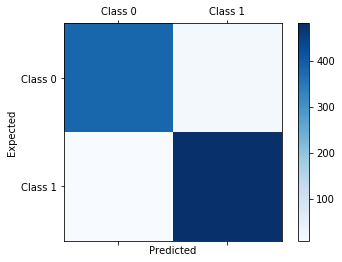

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Xavier Normal Initialization with Leaky Relu and Sigmoid including Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import glorot_normal
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
initializer = glorot_normal()
leaky_relu = LeakyReLU(alpha=0.01)
model_7= Sequential([
    Dense(100, input_shape=(28,),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(1, activation='sigmoid',kernel_initializer=initializer),
])

Using TensorFlow backend.


In [ ]:
model_7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_7.fit(X_train, Y_train,
          batch_size=32, epochs=80)

Epoch 1/80
2074/2074 [==============================] - 1s 310us/step - loss: 0.4816 - accuracy: 0.7608
Epoch 2/80
2074/2074 [==============================] - 0s 96us/step - loss: 0.2497 - accuracy: 0.9069
Epoch 3/80
2074/2074 [==============================] - 0s 96us/step - loss: 0.2154 - accuracy: 0.9224
Epoch 4/80
2074/2074 [==============================] - 0s 96us/step - loss: 0.1841 - accuracy: 0.9388
Epoch 5/80
2074/2074 [==============================] - 0s 89us/step - loss: 0.1681 - accuracy: 0.9412
Epoch 6/80
2074/2074 [==============================] - 0s 96us/step - loss: 0.1531 - accuracy: 0.9446
Epoch 7/80
2074/2074 [==============================] - 0s 96us/step - loss: 0.1487 - accuracy: 0.9455
Epoch 8/80
2074/2074 [==============================] - 0s 96us/step - loss: 0.1413 - accuracy: 0.9518
Epoch 9/80
2074/2074 [==============================] - 0s 96us/step - loss: 0.1341 - accuracy: 0.9489
Epoch 10/80
2074/2074 [==============================] - 0s 96us/step - 

In [ ]:
model_7.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 218us/step


0.974128246307373

In [ ]:
#Testing class
y_pred = model_7.predict_classes(X_test)
#Training class
Y_pred = model_7.predict_classes(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion Matrix -- Testing Class
confusion_matrix(Y_test, y_pred)

array([[392,  20],
       [  3, 474]], dtype=int64)

In [ ]:
# Confusion matrix -- training class
confusion_matrix(Y_train, Y_pred)

array([[ 932,    2],
       [   0, 1140]], dtype=int64)

In [ ]:
print("Testing Class Evaluation Metrics\n")
print("Testing Precision Score = ",precision_score(Y_test, y_pred))
print("Testing Recall Score = ",recall_score(Y_test, y_pred))
print("Testing F1 Score = ",f1_score(Y_test, y_pred))
print("Testing Cohen Kappa Score = ",cohen_kappa_score(Y_test, y_pred))
print("Testing Loss = ",log_loss(Y_test, y_pred))

Testing Class Evaluation Metrics

Testing Precision Score =  0.9595141700404858
Testing Recall Score =  0.9937106918238994
Testing F1 Score =  0.976313079299691
Testing Cohen Kappa Score =  0.9478317000176046
Testing Loss =  0.8935971305191793


In [ ]:
print("Training Class Evaluation Metrics\n")
print("Training Precision Score = ",precision_score(Y_train, Y_pred))
print("Training Recall Score = ",recall_score(Y_train, Y_pred))
print("Training F1 Score = ",f1_score(Y_train, Y_pred))
print("Training Cohen Kappa Score = ",cohen_kappa_score(Y_train, Y_pred))
print("Training Loss = ",log_loss(Y_train, Y_pred))

Training Class Evaluation Metrics

Training Precision Score =  0.9982486865148862
Training Recall Score =  1.0
Training F1 Score =  0.9991235758106924
Training Cohen Kappa Score =  0.9980517662795875
Training Loss =  0.033307209250088635


In [ ]:
model_7.evaluate(X_train, Y_train)[1]

2074/2074 [==============================] - 0s 23us/step


0.999035656452179

# He Normal Initialization with Leaky Relu and Sigmoid, including Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import he_normal
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
initializer = he_normal()
leaky_relu = LeakyReLU(alpha=0.01)
model_7= Sequential([
    Dense(100, input_shape=(28,),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(1, activation='sigmoid',kernel_initializer=initializer),
])

Using TensorFlow backend.


In [ ]:
model_7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_7.fit(X_train, Y_train,
          batch_size=32, epochs=70)

Epoch 1/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0448 - accuracy: 0.9812
Epoch 2/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0542 - accuracy: 0.9793
Epoch 3/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0578 - accuracy: 0.9802
Epoch 4/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0567 - accuracy: 0.9788
Epoch 5/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0484 - accuracy: 0.9826
Epoch 6/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0508 - accuracy: 0.9822
Epoch 7/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0491 - accuracy: 0.9855
Epoch 8/14
2074/2074 [==============================] - 0s 104us/step - loss: 0.0455 - accuracy: 0.9851
Epoch 9/14
2074/2074 [==============================] - 0s 96us/step - loss: 0.0501 - accuracy: 0.9831
Epoch 10/14
2074/2074 [==============================] - 0s 96us/step - 

In [ ]:
model_7.evaluate(X_test, Y_test)[1]

889/889 [==============================] - 0s 36us/step


0.9853768348693848

In [ ]:
model_7.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2900      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

In [ ]:
#Testing class
y_pred = model_7.predict_classes(X_test)
#Training class
Y_pred = model_7.predict_classes(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion Matrix -- Testing Class
confusion_matrix(Y_test, y_pred)

array([[390,   7],
       [  6, 486]], dtype=int64)

In [ ]:
# Confusion matrix -- training class
confusion_matrix(Y_train, Y_pred)

array([[ 948,    1],
       [   1, 1124]], dtype=int64)

In [ ]:
print("Testing Class Evaluation Metrics\n")
print("Testing Precision Score = ",precision_score(Y_test, y_pred))
print("Testing Recall Score = ",recall_score(Y_test, y_pred))
print("Testing F1 Score = ",f1_score(Y_test, y_pred))
print("Testing Cohen Kappa Score = ",cohen_kappa_score(Y_test, y_pred))
print("Testing Loss = ",log_loss(Y_test, y_pred))

Testing Class Evaluation Metrics

Testing Precision Score =  0.9858012170385395
Testing Recall Score =  0.9878048780487805
Testing F1 Score =  0.9868020304568528
Testing Cohen Kappa Score =  0.9704086257178923
Testing Loss =  0.5050727675093938


In [ ]:
print("Training Class Evaluation Metrics\n")
print("Training Precision Score = ",precision_score(Y_train, Y_pred))
print("Training Recall Score = ",recall_score(Y_train, Y_pred))
print("Training F1 Score = ",f1_score(Y_train, Y_pred))
print("Training Cohen Kappa Score = ",cohen_kappa_score(Y_train, Y_pred))
print("Training Loss = ",log_loss(Y_train, Y_pred))

Training Class Evaluation Metrics

Training Precision Score =  0.9991111111111111
Training Recall Score =  0.9991111111111111
Training F1 Score =  0.9991111111111111
Training Cohen Kappa Score =  0.9980573703313429
Training Loss =  0.03330682371613


In [ ]:
model_7.evaluate(X_train, Y_train)[1]

2074/2074 [==============================] - 0s 27us/step


0.999035656452179

Confusion matrix:
 [[390   7]
 [  6 486]]


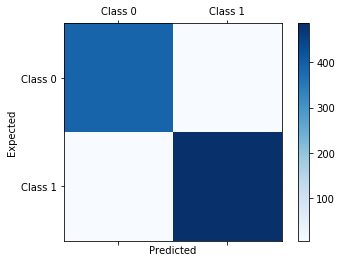

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Confusion matrix:
 [[ 948    1]
 [   1 1124]]


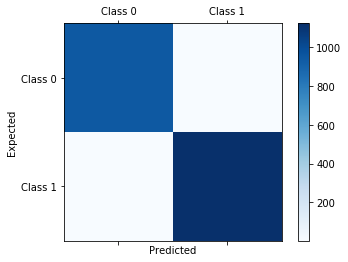

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=Y_train, y_pred=Y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()